In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
mpl.rcParams['font.size'] = 18
import scipy.stats as stats
import numpy as np
from astropy.io import fits

# Illustration de la densite spectrale d'une image standard

In [23]:
image =fits.getdata('img.fits', 0)/255

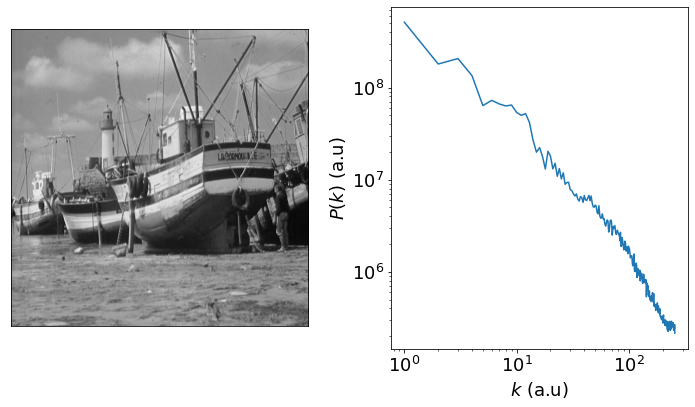

In [25]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
npix = image.shape[0]

fourier_image = np.fft.fftn(image)
fourier_amplitudes = np.abs(fourier_image)**2

kfreq = np.fft.fftfreq(npix) * npix
kfreq2D = np.meshgrid(kfreq, kfreq)
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

knrm = knrm.flatten()
fourier_amplitudes = fourier_amplitudes.flatten()

kbins = np.arange(0.5, npix//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])
Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

axs[0].imshow(image,cmap='gray')
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].loglog(kvals, Abins)
axs[1].set_xlabel("$k$ (a.u)")
axs[1].set_ylabel("$P(k)$ (a.u)")
plt.tight_layout()
plt.savefig('spectrum.png')